# Water Pump Functionality Prediction 
**By Assimagbe Albert Raphael**

![](https://i.imgur.com/8Ev8H1H.png 



# Introduction

Access to reliable water sources is vital for rural communities, yet many regions face challenges maintaining water pumps. The provided dataset contains detailed information on pump characteristics, location, and functionality, offering an opportunity to use machine learning to anticipate failures before they occur. This project applies classification models to predict whether a pump is functional, needs repair, or is non-functional, enabling stakeholders to target maintenance resources more effectively and reduce downtime.

**Success criterion:** Deliver a machine learning model and interactive dashboard that accurately identifies pumps requiring repair, with strong recall for this class, and provides geospatial insights to guide maintenance planning.

**Intended audience:** NGO field teams, local municipal planners, and international donors seeking data-driven strategies to improve water infrastructure reliability.


## Competition Link
[DrivenData - Pump it Up: Data Mining the Water Table](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/)


## Project Goals
1. Develop classification models to predict three target classes:
   - Functional water pumps
   - Water pumps that need repair
   - Non-functional water pumps
2. Analyze which factors most strongly influence water pump functionality
3. Create geospatial visualizations to communicate findings effectively
4. Deploy a simple dashboard to showcase models and insights

## Data Description

### Dataset Source
The data comes from Taarifa and the Tanzanian Ministry of Water, which aggregates information about water points across Tanzania.

### Features Overview
The dataset contains 40+ columns representing:
- Geographic information (coordinates, region, basin)
- Technical specifications (pump type, extraction method)
- Management details (installer, funder, payment type)
- Water characteristics (quality, quantity, source)
- Temporal information (construction year, recording date)

### Target Variable
- **status_group**: The operating condition of the waterpoint with three possible values:
  - `functional` - operational with no repairs needed
  - `functional needs repair` - operational but needs repairs
  - `non functional` - not operational

## Project Structure

### 1: Exploratory Data Analysis
- Clean and preprocess the dataset
- Handle missing values and categorical variables
- Create geospatial visualizations of water pump distribution
- Analyze relationships between features and pump functionality
- **Deliverable**: EDA report with visualizations and initial insights

### 2: Model Development
- Feature engineering and selection
- Train baseline classification models
- Implement cross-validation and hyperparameter tuning
- Evaluate models using appropriate classification metrics
- **Deliverable**: Trained models with documented performance metrics

### 3: Insights & Deployment
- Analyze feature importance and model explanations
- Create a Streamlit dashboard with interactive maps
- Document findings and recommendations for maintenance strategies
- **Deliverable**: Interactive dashboard and final presentation

### Required Libraries
```
pandas
numpy
scikit-learn
matplotlib
seaborn
geopandas
folium
streamlit
plotly
```

## Technical Requirements

### Required Technologies
- Python (pandas, scikit-learn, matplotlib/seaborn)
- Geospatial libraries (GeoPandas, Folium)
- Jupyter Notebooks for exploration and documentation
- GitHub for version control
- Streamlit for dashboard creation

### Performance Metric
- Classification accuracy (primary metric)
- Additional metrics: F1-score, precision, recall, and confusion matrix

## Resources

### Dataset Files
- `training_set.csv`: Training data with labels
- `test_set.csv`: Test data for predictions
- `SubmissionFormat.csv`: Template for competition submissions

### Technical Resources
- [Scikit-learn Classification Documentation](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)
- [GeoPandas Documentation](https://geopandas.org/en/stable/)
- [Folium Documentation](https://python-visualization.github.io/folium/)
- [Streamlit Documentation](https://docs.streamlit.io/)

### Domain Resources
- [Taarifa Platform](https://taarifa.org/)
- [Tanzania Water Point Mapping Project](https://www.maji.go.tz/)

## Acknowledgments
- Data provided by Taarifa and the Tanzania Ministry of Water
- Project taken from the DrivenData competition

# 01. Project Setup and Data Exploration

**A. Necessary imports**

In [1]:
# Required imports

import warnings
warnings.filterwarnings('ignore')

# Core libraries
import numpy as np
import pandas as pd
import time
import pickle

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Typing
from typing import Dict, List, Optional, Set

# Scikit-learn
from sklearn import svm, model_selection, tree, linear_model, neighbors, naive_bayes, ensemble
from sklearn import discriminant_analysis, gaussian_process
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, classification_report, roc_curve, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2, VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve

from sklearn.model_selection import cross_validate
from sklearn.metrics import (roc_auc_score, accuracy_score, precision_score, 
                           recall_score, f1_score, confusion_matrix)
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                            AdaBoostClassifier)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from IPython.display import display

# Advanced models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import Pool, CatBoostClassifier, CatBoostRegressor
from sklearn.preprocessing import MinMaxScaler

# Multi-label learning
from skmultilearn.problem_transform import BinaryRelevance

# Hyperparameter optimization
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

# Statistical libraries
from scipy import stats
import statsmodels.api as sm

**B. Traning Datasets URL**

In [2]:
# Reading the data

Values_dataset_url1 = 'https://raw.githubusercontent.com/albert-raphael/water-pump/refs/heads/main/Data/Training_set_values.csv'

labels_dataset_url2 = 'https://raw.githubusercontent.com/albert-raphael/water-pump/refs/heads/main/Data/Training_set_labels.csv'


In [3]:
# Load the Training Value dataset from the current working directory into a pandas DataFrame 1

try:
    X_df = pd.read_csv(Values_dataset_url1)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Failed to load data: {e}")

Data loaded successfully.


In [4]:
# Load the TRAINING Label dataset from the current working directory into a pandas DataFrame 2

try:
    Y_df = pd.read_csv(labels_dataset_url2)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Failed to load data: {e}")

Data loaded successfully.


In [5]:
# Display the shape of the datasets

print('Shape of X: ',X_df.shape)
print('Shape of Y: ',Y_df.shape)

Shape of X:  (59400, 40)
Shape of Y:  (59400, 2)


**C. Merging The Datasets of the Training Values and the Lables**

In [6]:
# Merge training labels
df = pd.merge(X_df, Y_df, on='id')
print('Files successfully loaded and merged!')

Files successfully loaded and merged!


# 02 The Exploratory Data Analysis (EDA) and Visualizations

**A. Exploratory Data Analysis on Training Datasets (structure, missingness, geospatial)**

In [7]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [8]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [9]:
#Information about the Training data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [10]:
# Check the Training data description
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


**B. Handling Missing Values for the Training Data**

In [11]:
# Missing values
missing = df.isna().mean().sort_values(ascending=False)
missing.head(10)

scheme_name              0.485017
scheme_management        0.065286
installer                0.061532
funder                   0.061229
public_meeting           0.056128
permit                   0.051448
subvillage               0.006246
wpt_name                 0.000034
water_quality            0.000000
extraction_type_class    0.000000
dtype: float64

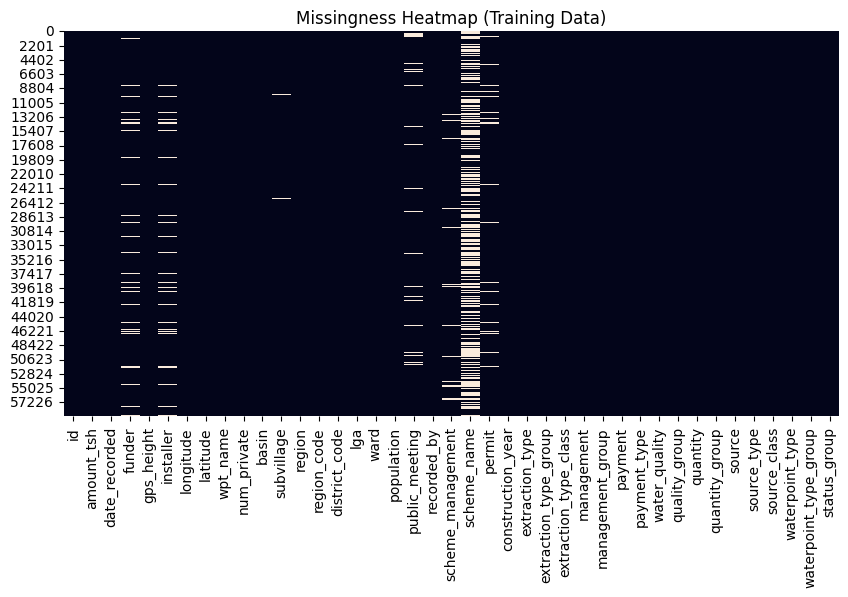

In [12]:
# Visualize missingness
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missingness Heatmap (Training Data)")
plt.show()


In [13]:
# Handling Missing Values in the Training Data

# 1. Remove columns with high missing values (>40%)
high_missing_thresh = 0.4
cols_to_drop = df.isna().mean()[df.isna().mean() > high_missing_thresh].index
df = df.drop(columns=cols_to_drop)
print(f"Dropped columns with high missing values: {list(cols_to_drop)}")

# 2. Impute columns with moderate missing values (5% - 40%) using mode
moderate_missing_cols = df.isna().mean()[(df.isna().mean() > 0.05) & 
                                               (df.isna().mean() <= high_missing_thresh)].index

for col in moderate_missing_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
    print(f"Imputed moderate missing column '{col}' with mode: {mode_value}")

# 3. Impute columns with low missing values (<5%) using mode
low_missing_cols = df.isna().mean()[(df.isna().mean() > 0) & 
                                          (df.isna().mean() <= 0.05)].index

for col in low_missing_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
    print(f"Imputed low missing column '{col}' with mode: {mode_value}")

# 4. Check final missing values
missing_final = df.isna().sum()
print("\nFinal missing values after handling:")
print(missing_final[missing_final > 0])


Dropped columns with high missing values: ['scheme_name']
Imputed moderate missing column 'funder' with mode: Government Of Tanzania
Imputed moderate missing column 'installer' with mode: DWE
Imputed moderate missing column 'public_meeting' with mode: True
Imputed moderate missing column 'scheme_management' with mode: VWC
Imputed moderate missing column 'permit' with mode: True
Imputed low missing column 'wpt_name' with mode: none
Imputed low missing column 'subvillage' with mode: Madukani

Final missing values after handling:
Series([], dtype: int64)


In [14]:
df.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
w

In [15]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [16]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [17]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

**C. Explore Relationships Between Features and Target (status_group)** 


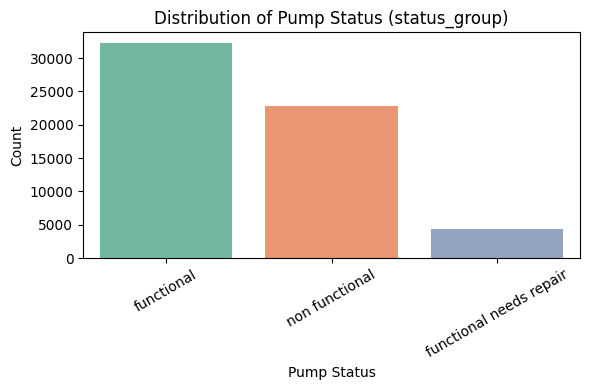

Class counts:
 status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64

Class proportions (%):
 status_group
functional                 54.308081
non functional             38.424242
functional needs repair     7.267677
Name: proportion, dtype: float64


In [18]:
# 1. Target variable analysis with seaborn.countplot

plt.figure(figsize=(6,4))
sns.countplot(
    x="status_group",
    data=df,
    order=df["status_group"].value_counts().index,  # ensures most common first
    palette="Set2"
)

plt.title("Distribution of Pump Status (status_group)")
plt.ylabel("Count")
plt.xlabel("Pump Status")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Print counts and proportions for clarity
print("Class counts:\n", df["status_group"].value_counts())
print("\nClass proportions (%):\n", df["status_group"].value_counts(normalize=True) * 100)


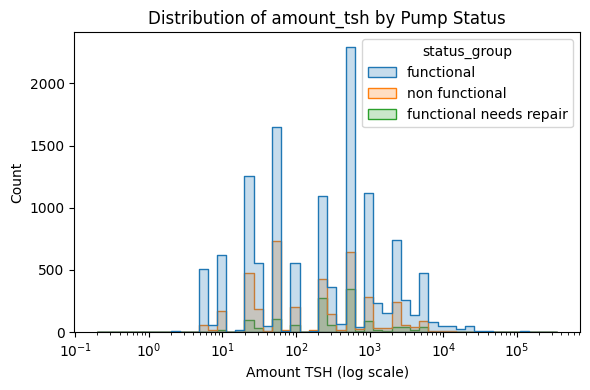

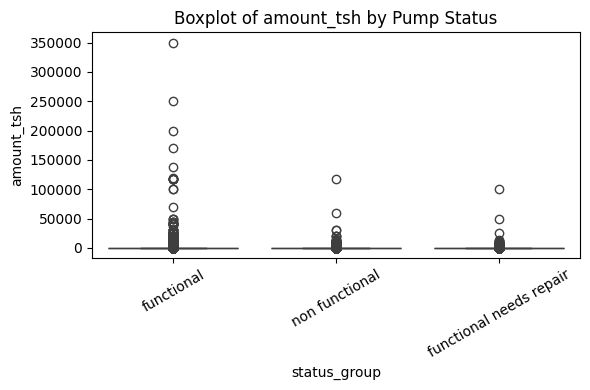

In [19]:
# 2. Numeric Feature: amount_tsh (hist + boxplot)

plt.figure(figsize=(6,4))
sns.histplot(data=df, x="amount_tsh", hue="status_group", bins=50, element="step", log_scale=True)
plt.title("Distribution of amount_tsh by Pump Status")
plt.xlabel("Amount TSH (log scale)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="status_group", y="amount_tsh")
plt.title("Boxplot of amount_tsh by Pump Status")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

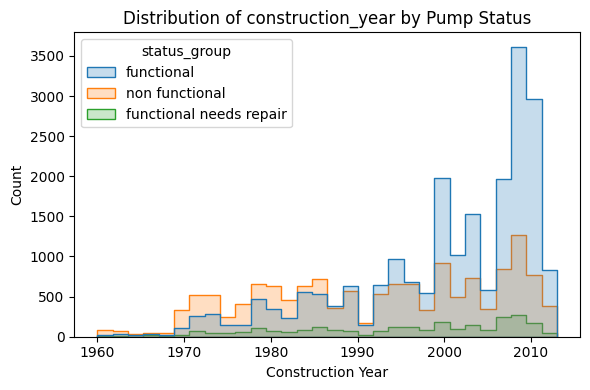

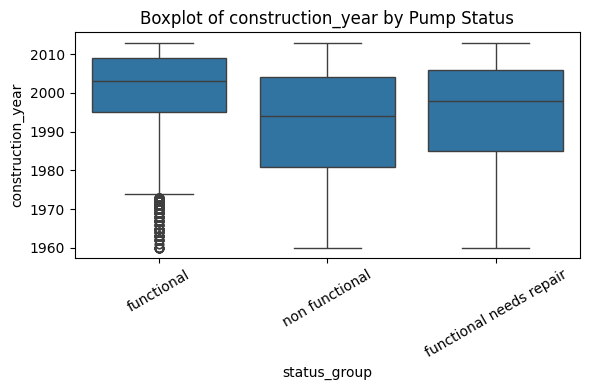

In [20]:
# 3. Numeric Feature: construction_year

plt.figure(figsize=(6,4))
sns.histplot(data=df[df["construction_year"] > 0],  # exclude 0 if it means "missing"
             x="construction_year", hue="status_group", bins=30, element="step")
plt.title("Distribution of construction_year by Pump Status")
plt.xlabel("Construction Year")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(data=df[df["construction_year"] > 0], x="status_group", y="construction_year")
plt.title("Boxplot of construction_year by Pump Status")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

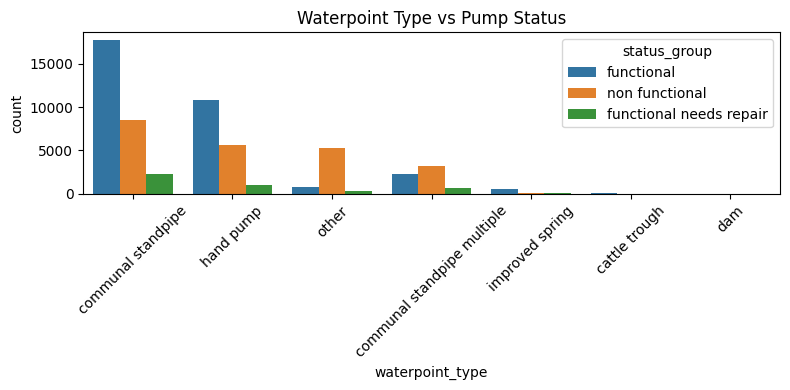

In [21]:
# 4. Categorical Feature: waterpoint_type

plt.figure(figsize=(8,4))
sns.countplot(data=df, x="waterpoint_type", hue="status_group",
              order=df["waterpoint_type"].value_counts().index)
plt.title("Waterpoint Type vs Pump Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

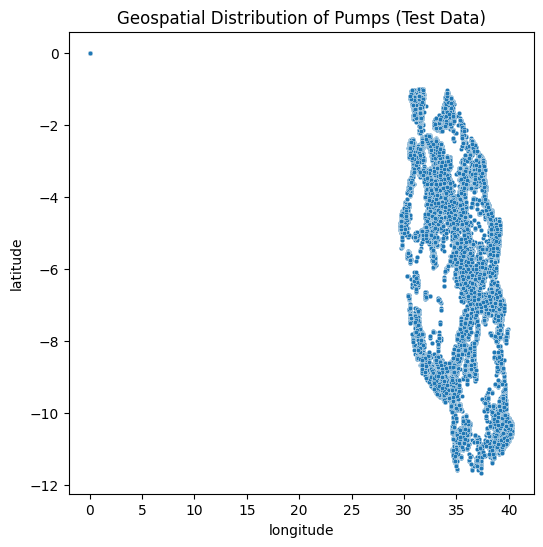

In [22]:
# 5. Geospatial scatter (if lat/lon exist)

lat_cols = [c for c in df.columns if "lat" in c.lower()]
lon_cols = [c for c in df.columns if "lon" in c.lower()]

if lat_cols and lon_cols:
    lat, lon = lat_cols[0], lon_cols[0]
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=lon, y=lat, data=df, s=10)
    plt.title("Geospatial Distribution of Pumps (Test Data)")
    plt.show()


**D. Correlation Analysis**

*1. Correlation heatmap (visual overview of how numeric features relate to each other).*

*2. Correlation with target (status_group) → but since the target is categorical, we’ll convert it to numbers first.*

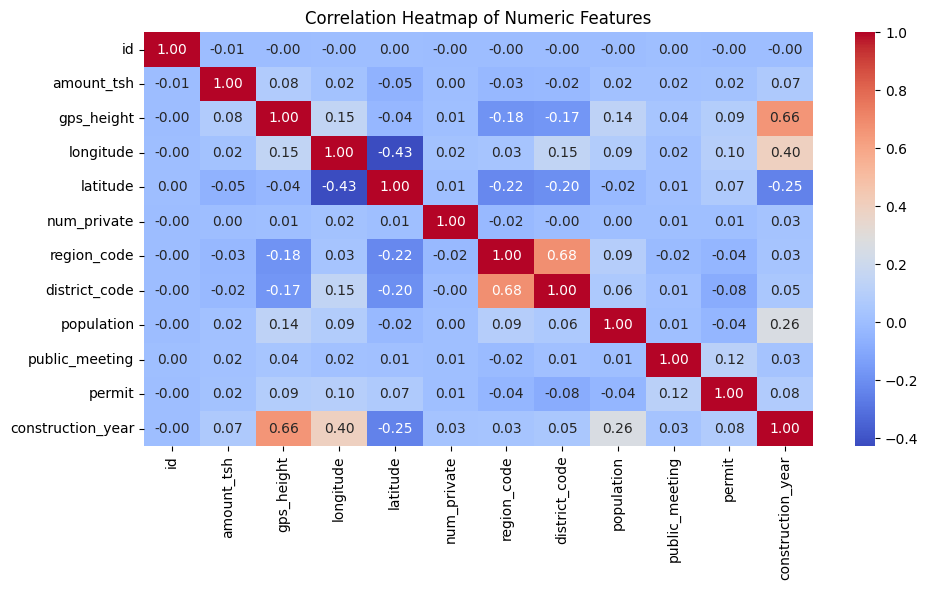

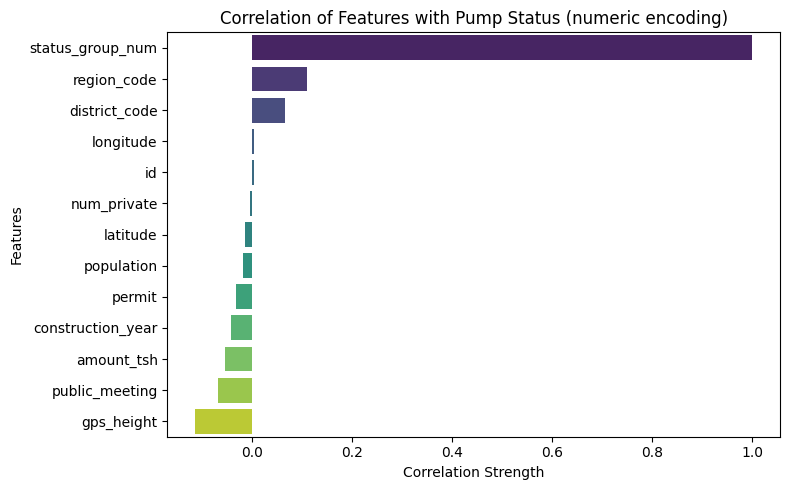

Feature correlations with target:

status_group_num     1.000000
region_code          0.108640
district_code        0.065687
longitude            0.004366
id                   0.004049
num_private         -0.005021
latitude            -0.014547
population          -0.017759
permit              -0.033459
construction_year   -0.043342
amount_tsh          -0.053702
public_meeting      -0.067965
gps_height          -0.114029
Name: status_group_num, dtype: float64


In [23]:
# 1. Correlation Heatmap (numeric features only)
plt.figure(figsize=(10, 6))
corr_matrix = df.corr(numeric_only=True)   # only numeric columns
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

# 2. Correlation of Features with Target (status_group)
# Convert target to numbers (so correlation can be calculated)
df_target = df.copy()
df_target["status_group_num"] = df_target["status_group"].astype("category").cat.codes

# Calculate correlations with the target
target_corr = df_target.corr(numeric_only=True)["status_group_num"].sort_values(ascending=False)

# Plot as bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="viridis")
plt.title("Correlation of Features with Pump Status (numeric encoding)")
plt.xlabel("Correlation Strength")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Print correlations for reference
print("Feature correlations with target:\n")
print(target_corr)


**E. Pairplot Diagram**

*Find the top 3 features most correlated with the target. Use Seaborn’s pairplot to show how they vary with status_group.*

Top 3 correlated features with target: ['gps_height', 'region_code', 'public_meeting']


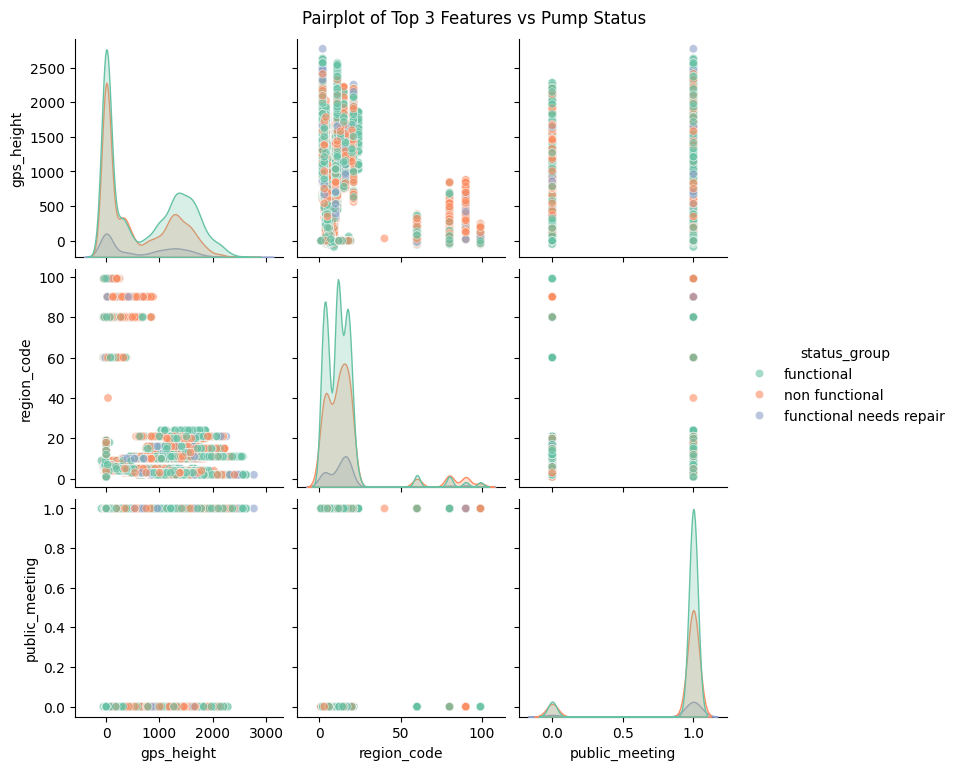

In [24]:

# Copy dataframe and encode target as numbers for correlation
df_target = df.copy()
df_target["status_group_num"] = df_target["status_group"].astype("category").cat.codes

# Get top 3 correlated features with target (excluding the target itself)
target_corr = df_target.corr(numeric_only=True)["status_group_num"].drop("status_group_num")
top_features = target_corr.abs().sort_values(ascending=False).head(3).index.tolist()

print("Top 3 correlated features with target:", top_features)

# Pairplot
sns.pairplot(
    df_target[top_features + ["status_group"]],
    hue="status_group",
    diag_kind="kde",
    palette="Set2",
    plot_kws={"alpha": 0.6}
)
plt.suptitle("Pairplot of Top 3 Features vs Pump Status", y=1.02)
plt.show()


In [25]:
print("✅ EDA complete for Training Data")


✅ EDA complete for Training Data


# 03. Data Preprocessing and Feature Engineering


**A. Feature Engineering**

In [ ]:
# ================================
# 1. IMPORT LIBRARIES
# ================================
from datetime import datetime
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# ================================
# 2. COPY DATA
# ================================
df_fe = df.copy()

# ================================
# 3. AGE FEATURE
# ================================
current_year = datetime.now().year
df_fe["age"] = current_year - df_fe["construction_year"]

# ================================
# 4. DOMAIN-INSPIRED FEATURES
# ================================
df_fe["is_old_pump"] = (df_fe["age"] > 20).astype(int)
df_fe["is_recent_pump"] = (df_fe["age"] <= 10).astype(int)

# ================================
# 5. HANDLE RARE CATEGORIES
# ================================
rare_thresh = 0.01  # 1%
cat_cols = df_fe.select_dtypes(include="object").columns

for col in cat_cols:
    freqs = df_fe[col].value_counts(normalize=True)
    rare_cats = freqs[freqs < rare_thresh].index
    df_fe[col] = df_fe[col].replace(rare_cats, "Other")

# ================================
# 6. DROP HIGH-CARDINALITY COLUMNS
# ================================
high_card_cols = ['subvillage', 'wpt_name']
for col in high_card_cols:
    if col in df_fe.columns:
        df_fe = df_fe.drop(columns=col)

# ================================
# 7. SEPARATE FEATURES AND TARGET
# ================================
y = df_fe["status_group"]
X = df_fe.drop(columns=["status_group"])

# ================================
# 8. ONE-HOT ENCODE CATEGORICAL FEATURES
# ================================
cat_cols = X.select_dtypes(include="object").columns.tolist()
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# ================================
# 9. TRAIN-VALIDATION SPLIT (Split into training and validation sets (80/20))
# ================================
X_train, X_val, y_train, y_val = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# ================================
# 10. SCALE NUMERICAL FEATURES
# ================================
scaler = StandardScaler()
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])

# ================================
# 11. DATASET OVERVIEW
# ================================
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

print("\nTarget distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nTarget distribution in validation set:")
print(y_val.value_counts(normalize=True))


Training set shape: (47520, 205) (47520,)
Validation set shape: (11880, 205) (11880,)

Target distribution in training set:
status_group
functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: proportion, dtype: float64

Target distribution in validation set:
status_group
functional                 0.543098
non functional             0.384259
functional needs repair    0.072643
Name: proportion, dtype: float64


**B. Visualize Target Distribution**

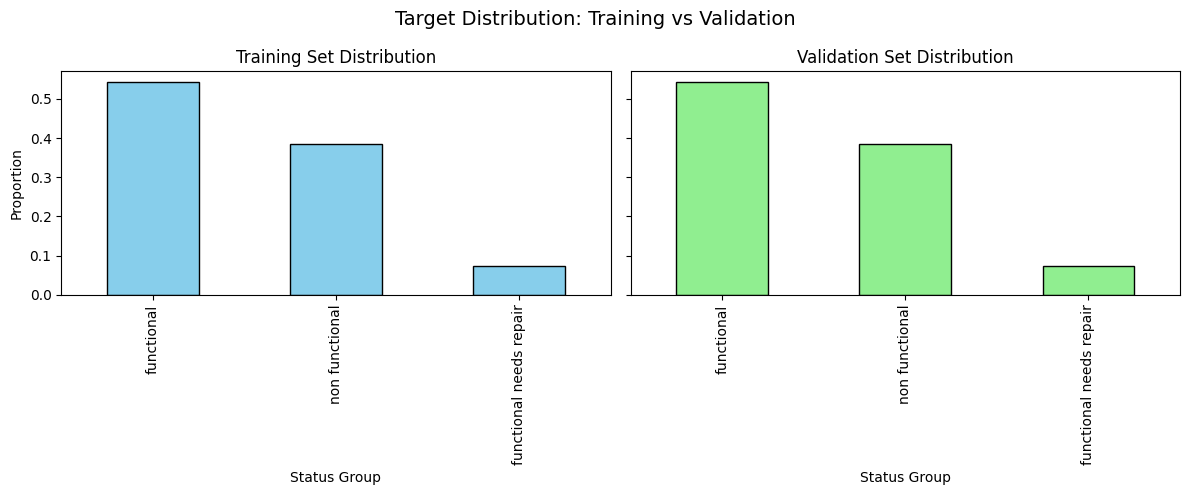

In [ ]:
# 12. VISUALIZE TARGET DISTRIBUTION

fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Training set distribution
y_train.value_counts(normalize=True).plot(kind="bar", ax=ax[0], color="skyblue", edgecolor="black")
ax[0].set_title("Training Set Distribution")
ax[0].set_ylabel("Proportion")
ax[0].set_xlabel("Status Group")

# Validation set distribution
y_val.value_counts(normalize=True).plot(kind="bar", ax=ax[1], color="lightgreen", edgecolor="black")
ax[1].set_title("Validation Set Distribution")
ax[1].set_xlabel("Status Group")

plt.suptitle("Target Distribution: Training vs Validation", fontsize=14)
plt.tight_layout()
plt.show()


**C. Feature Engineering Usage**

In [57]:
# Display a sample of the processed features
print("Processed features:")
print(X_val_enc.head())

Processed features:
          id  amount_tsh  gps_height  longitude  latitude  num_private  \
3290   67999         0.0           0  31.509864 -1.153080            0   
47666   9256      2000.0        1576  29.838600 -4.429692            0   
2538    3168        25.0         898  37.748364 -4.061791            0   
53117  19684         0.0           0  33.380346 -3.132556            0   
51817  42303         0.0         548  37.648831 -6.725480            0   

       region_code  district_code  population  public_meeting  ...  \
3290            18              7           0            True  ...   
47666           16              2           1            True  ...   
2538             3              3         420            True  ...   
53117           19              4           0            True  ...   
51817            5              5         500            True  ...   

       source_type_spring  source_class_other  source_class_surface  \
3290                False               Fal

In [ ]:
#Print selected columns from feature engineering

df_fe_tuple = feature_engineering(df, rare_thresh=0.01)
df_fe = df_fe_tuple[0]  # get the processed DataFrame
print(df_fe[['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 
             'num_private', 'region_code', 'district_code', 
             'population', 'public_meeting']].head())

             id  amount_tsh  gps_height  longitude  latitude  num_private  \
43360  1.676644   -0.100690   -0.966189  -0.082347 -1.179353    -0.035885   
7263   1.322635    0.055697    1.990527   0.089031 -1.224833    -0.035885   
2486  -1.707880   -0.092870   -0.547718   0.634332 -0.161144    -0.035885   
313   -1.669163   -0.100690   -0.966189  -0.513692  1.501679    -0.035885   
52726 -0.468755   -0.100690   -0.966189   0.199466 -0.235949    -0.035885   

       region_code  district_code  population  public_meeting  
43360    -0.185869      -0.168042   -0.388285            True  
7263     -0.242914      -0.168042   -0.010377            True  
2486     -0.528139      -0.479855    4.578495            True  
313       0.156401      -0.479855   -0.388285            True  
52726    -0.813363       0.039834   -0.388285            True  


# 04. Model Building and Evaluation

**🛠️ Machine Learning Pipeline – Step by Step**

**A. Split Data (Train/Validation)**

In [ ]:
# X_encoded and y are already preprocessed from feature engineering
X_train, X_val, y_train, y_val = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

**B. SCALING NUMERIC FEATURES (for models that need it, e.g., LogisticRegression)**

In [63]:
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val_scaled[num_cols] = scaler.transform(X_val[num_cols])


**C . RANDOM FOREST CLASSIFIER**

=== Random Forest Classifier ===
Accuracy: 0.8083333333333333

Classification Report:
                          precision    recall  f1-score   support

             functional       0.81      0.88      0.85      6452
functional needs repair       0.53      0.32      0.40       863
         non functional       0.83      0.79      0.81      4565

               accuracy                           0.81     11880
              macro avg       0.73      0.67      0.69     11880
           weighted avg       0.80      0.81      0.80     11880



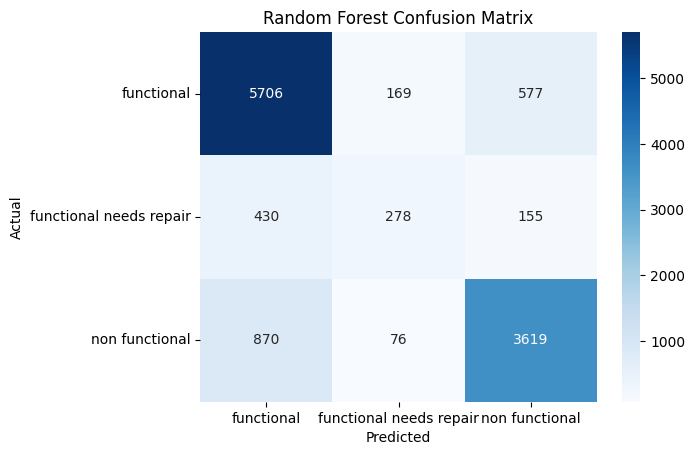

In [64]:
# Initialize model
rf_model = RandomForestClassifier(random_state=42, n_estimators=200)

# Train model
rf_model.fit(X_train, y_train)

# Predict on validation set
y_pred_rf = rf_model.predict(X_val)

# Evaluate performance
print("=== Random Forest Classifier ===")
print("Accuracy:", accuracy_score(y_val, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_val, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_val, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Random Forest Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


**D. GRADIENT BOOSTING CLASSIFIER**

=== Gradient Boosting Classifier ===
Accuracy: 0.7707070707070707

Classification Report:
                          precision    recall  f1-score   support

             functional       0.75      0.91      0.82      6452
functional needs repair       0.66      0.16      0.26       863
         non functional       0.82      0.68      0.75      4565

               accuracy                           0.77     11880
              macro avg       0.74      0.59      0.61     11880
           weighted avg       0.77      0.77      0.75     11880



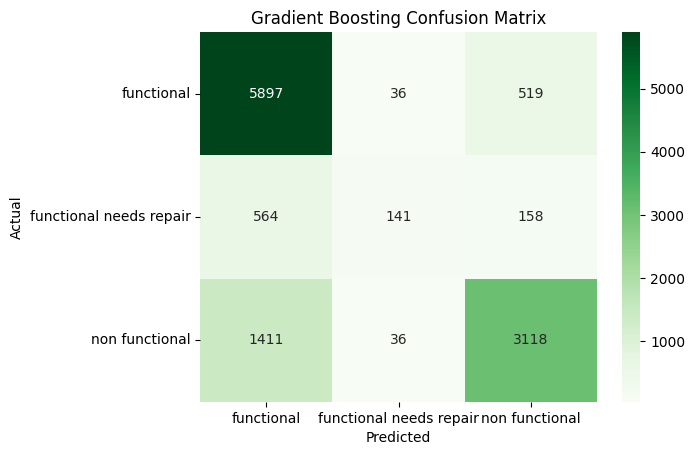

In [65]:
# Initialize model
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=200)

# Train model
gb_model.fit(X_train, y_train)

# Predict on validation set
y_pred_gb = gb_model.predict(X_val)

# Evaluate performance
print("=== Gradient Boosting Classifier ===")
print("Accuracy:", accuracy_score(y_val, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_val, y_pred_gb))

# Confusion matrix
cm_gb = confusion_matrix(y_val, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Greens',
            xticklabels=gb_model.classes_, yticklabels=gb_model.classes_)
plt.title("Gradient Boosting Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**E. LOGISTIC REGRESSION (scaled data)**

=== Logistic Regression ===
Accuracy: 0.7300505050505051

Classification Report:
                          precision    recall  f1-score   support

             functional       0.72      0.87      0.79      6452
functional needs repair       0.40      0.07      0.12       863
         non functional       0.75      0.66      0.70      4565

               accuracy                           0.73     11880
              macro avg       0.62      0.53      0.54     11880
           weighted avg       0.71      0.73      0.71     11880



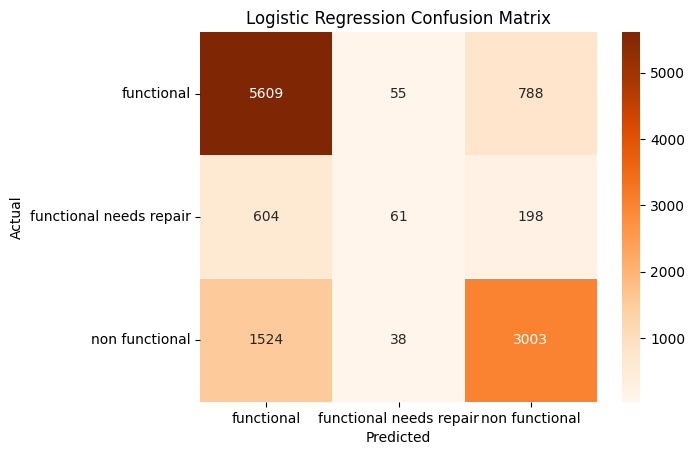

In [66]:
# Initialize model
lr_model = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')

# Train model (using scaled data)
lr_model.fit(X_train_scaled, y_train)

# Predict on validation set
y_pred_lr = lr_model.predict(X_val_scaled)

# Evaluate performance
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_val, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_val, y_pred_lr))

# Confusion matrix
cm_lr = confusion_matrix(y_val, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Oranges',
            xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.title("Logistic Regression Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


**F. LIGHTGBM CLASSIFIER**

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1969
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 204
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Info] Start training from score -0.956493
=== LightGBM Classifier ===
Accuracy: 0.8025252525252525

Classification Report:
                          precision    recall  f1-score   support

             functional       0.79      0.90      0.84      6452
functional needs repair       0.61      0.27      0.38       863
         non functional       0.84      0.76      0.80      4565

               accuracy                           0.80     1

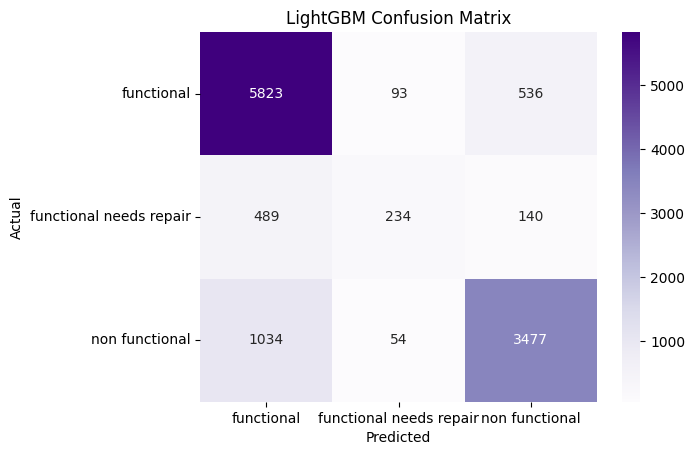

In [67]:
# Initialize model
lgb_model = LGBMClassifier(random_state=42, n_estimators=500)

# Train model
lgb_model.fit(X_train, y_train)

# Predict on validation set
y_pred_lgb = lgb_model.predict(X_val)

# Evaluate performance
print("=== LightGBM Classifier ===")
print("Accuracy:", accuracy_score(y_val, y_pred_lgb))
print("\nClassification Report:\n", classification_report(y_val, y_pred_lgb))

# Confusion matrix
cm_lgb = confusion_matrix(y_val, y_pred_lgb)
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Purples',
            xticklabels=lgb_model.classes_, yticklabels=lgb_model.classes_)
plt.title("LightGBM Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


**G. CATBOOST CLASSIFIER**

=== CatBoost Classifier ===
Accuracy: 0.7927609427609428

Classification Report:
                          precision    recall  f1-score   support

             functional       0.78      0.90      0.84      6452
functional needs repair       0.62      0.24      0.35       863
         non functional       0.83      0.74      0.78      4565

               accuracy                           0.79     11880
              macro avg       0.74      0.63      0.66     11880
           weighted avg       0.79      0.79      0.78     11880



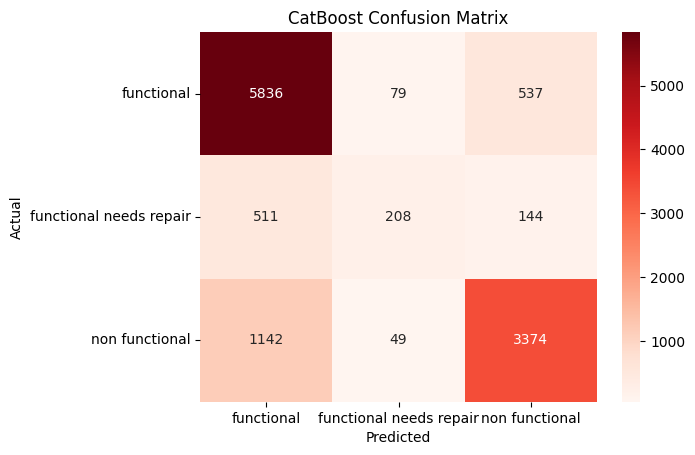

In [68]:
# Initialize model (silent=True avoids verbose output)
cat_model = CatBoostClassifier(random_state=42, iterations=500, silent=True)

# Train model
cat_model.fit(X_train, y_train)

# Predict on validation set
y_pred_cat = cat_model.predict(X_val)

# Evaluate performance
print("=== CatBoost Classifier ===")
print("Accuracy:", accuracy_score(y_val, y_pred_cat))
print("\nClassification Report:\n", classification_report(y_val, y_pred_cat))

# Confusion matrix
cm_cat = confusion_matrix(y_val, y_pred_cat)
sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Reds',
            xticklabels=cat_model.classes_, yticklabels=cat_model.classes_)
plt.title("CatBoost Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


**H. 🛠️ Model Comparison – Table & Chart**

                 Model  Accuracy  F1_macro  F1_weighted
0        Random Forest  0.808333  0.686975     0.801614
3             LightGBM  0.802525  0.672634     0.792231
4             CatBoost  0.792761  0.655676     0.780718
1    Gradient Boosting  0.770707  0.610463     0.752842
2  Logistic Regression  0.730051  0.537567     0.707893


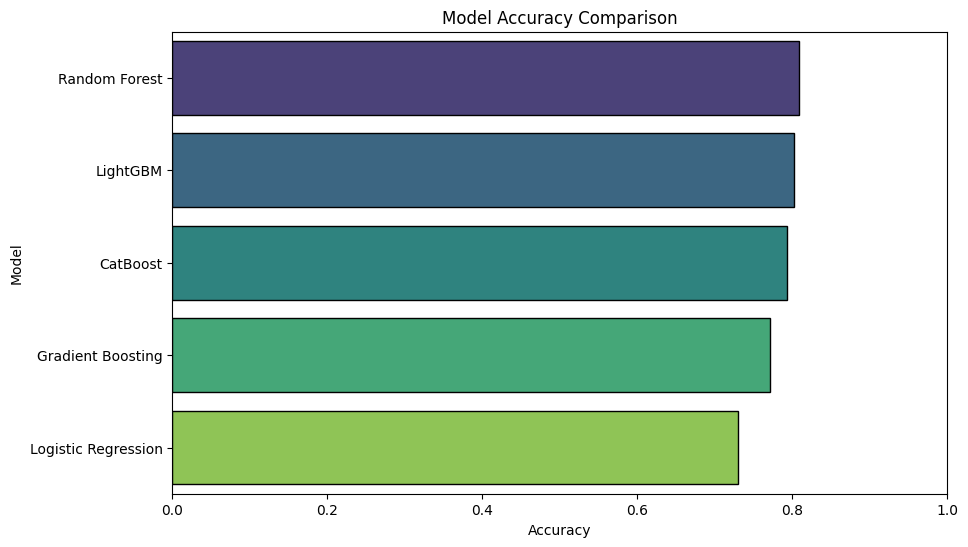

In [69]:
from sklearn.metrics import f1_score

# -------------------------------
# 1. Collect Model Names & Predictions
# -------------------------------
models = ['Random Forest', 'Gradient Boosting', 'Logistic Regression', 'LightGBM', 'CatBoost']
predictions = [y_pred_rf, y_pred_gb, y_pred_lr, y_pred_lgb, y_pred_cat]

# -------------------------------
# 2. Evaluate Metrics
# -------------------------------
results = []

for model_name, y_pred in zip(models, predictions):
    acc = accuracy_score(y_val, y_pred)
    f1_macro = f1_score(y_val, y_pred, average='macro')
    f1_weighted = f1_score(y_val, y_pred, average='weighted')
    results.append({
        'Model': model_name,
        'Accuracy': acc,
        'F1_macro': f1_macro,
        'F1_weighted': f1_weighted
    })

# -------------------------------
# 3. Create DataFrame
# -------------------------------
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print(results_df)

# -------------------------------
# 4. Visualize with Bar Chart
# -------------------------------
plt.figure(figsize=(10,6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis', edgecolor='black')
plt.title("Model Accuracy Comparison")
plt.xlim(0,1)
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()


**I. HYPERPARAMETER TUNING (Example: Random Forest)**

In [70]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid, cv=3, scoring='accuracy', n_jobs=-1)

grid_rf.fit(X_train, y_train)

# Best params and score
print("Best RF Parameters:", grid_rf.best_params_)
print("Best CV Score:", grid_rf.best_score_)

# Evaluate on validation set
y_pred_grid_rf = grid_rf.predict(X_val)
print("Validation Accuracy (Tuned RF):", accuracy_score(y_val, y_pred_grid_rf))


Best RF Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Score: 0.8012836700336701
Validation Accuracy (Tuned RF): 0.8113636363636364


END HERE: CONTINUE NEXT TIME

# 02 The exploratory data analysis (EDA) Train Data

**Exploratory Data Analysis on Training Data (target + features)**

In [ ]:
### Joining the trian_df3 & lable_df2 into a single dataframe ###
Z = label_df2gt
Z.drop('respondent_id',axis = 1,inplace = True)
frames = [trian_df3,Z]
data = pd.concat(frames,axis=1)

NameError: name 'label_df2gt' is not defined

In [ ]:
#Test Data

test_dataset_url = 'https://raw.githubusercontent.com/albert-raphael/water-pump/refs/heads/main/Data/Test_set_values.csv'


In [ ]:
# Load the Test Value dataset from the current working directory into a pandas DataFrame

try:
    test_df = pd.read_csv(test_dataset_url)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Failed to load data: {e}")

In [ ]:
print('Shape of test_df1: ',test_df.shape)
